In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
housetrain=pd.read_csv("train.csv")

In [3]:
housetest=pd.read_csv("test.csv")

In [4]:
print(housetrain.shape)
print(housetest.shape)

(1460, 81)
(1459, 80)


In [5]:
housetrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
housetest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
# Temporarily add dependent variable to test data for concatenation
housetest['SalePrice']='test'

In [8]:
# Concatenate Train and Test for preprocessing
combinedf=pd.concat([housetrain,housetest],axis=0)

In [9]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [10]:
# Split into object and numeric columns
objcols=combinedf.select_dtypes(include=['object'])
numcols=combinedf.select_dtypes(include=np.number)

In [11]:
objcols.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
GarageCond        159
GarageQual        159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MSZoning            4
Utilities           2
Functional          2
Exterior2nd         1
Electrical          1
SaleType            1
Exterior1st         1
KitchenQual         1
RoofStyle           0
Neighborhood        0
SaleCondition       0
ExterQual           0
LotShape            0
LandContour         0
ExterCond           0
PavedDrive          0
LotConfig           0
LandSlope           0
Condition1          0
HouseStyle          0
Condition2          0
Foundation          0
RoofMatl            0
Street              0
CentralAir          0
HeatingQC           0
Heating             0
BldgType            0
SalePrice           0
dtype: int64

In [12]:
objcols.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [13]:
# Missing Value or NA in these variables means - Not Available
notavailablecols=['Alley','BsmtQual', 'BsmtCond', 'BsmtExposure', 
                  'BsmtFinType1', 'BsmtFinType2','FireplaceQu', 
                  'GarageType', 'GarageFinish', 'GarageQual','GarageCond',
                  'PoolQC', 'Fence', 'MiscFeature']

In [14]:
for col in notavailablecols:
    objcols[col]=objcols[col].fillna("Not Available")

In [15]:
# Imputing Remaining Missing Values with most_frequent/mode
for col in objcols.columns:
    objcols[col]=objcols[col].fillna(objcols[col].value_counts().idxmax())
# idxmax() - impute with index/classname of maximum frequency

In [16]:
numcols.isnull().sum().sort_values(ascending=False)

LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
BsmtFinSF2         1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF1         1
KitchenAbvGr       0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
Fireplaces         0
TotRmsAbvGrd       0
Id                 0
BedroomAbvGr       0
HalfBath           0
FullBath           0
MSSubClass         0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
YrSold             0
dtype: int64

In [17]:
# Seperate Categorical Variables from numeric variables like rating scale,
# date related like year, month, etc.
numcols.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [18]:
catcols=numcols[[ 'OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd',
                'GarageYrBlt','MoSold', 'YrSold']]

In [19]:
numcols=numcols.drop([ 'OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd',
                'GarageYrBlt','MoSold', 'YrSold'],axis=1)

In [20]:
numcols.isnull().sum().sort_values(ascending=False)

LotFrontage      486
MasVnrArea        23
BsmtFullBath       2
BsmtHalfBath       2
GarageCars         1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageArea         1
Id                 0
WoodDeckSF         0
ScreenPorch        0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
TotRmsAbvGrd       0
PoolArea           0
Fireplaces         0
FullBath           0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
MSSubClass         0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
LotArea            0
MiscVal            0
dtype: int64

In [21]:
# Median imputation for numcols
for col in numcols.columns:
    numcols[col]=numcols[col].fillna(numcols[col].median())

In [22]:
catcols.isnull().sum().sort_values(ascending=False)

GarageYrBlt     159
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MoSold            0
YrSold            0
dtype: int64

In [23]:
# Imputing Missing Values with Mode/Most_Frequent
catcols.GarageYrBlt=catcols.GarageYrBlt.fillna(
    catcols.GarageYrBlt.value_counts().idxmax())

In [24]:
catcols['MSSubClass']=numcols.MSSubClass

In [25]:
numcols=numcols.drop('MSSubClass',axis=1)

In [26]:
# concat all 3 dataframes for further EDA
combinedf_EDA=pd.concat([numcols,objcols,catcols],axis=1)

In [27]:
housedf_EDA=combinedf_EDA[combinedf_EDA.SalePrice!='test']

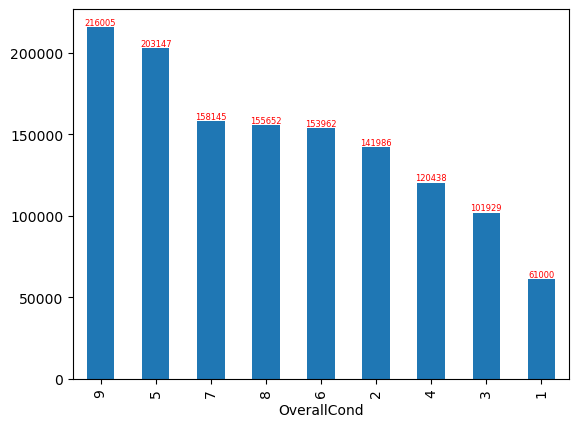

In [28]:
# SalePrice and OverallCond
ax=housedf_EDA.SalePrice.groupby(
    housedf_EDA.OverallCond).mean().sort_values(
ascending=False).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i,fontsize=6,color="red")

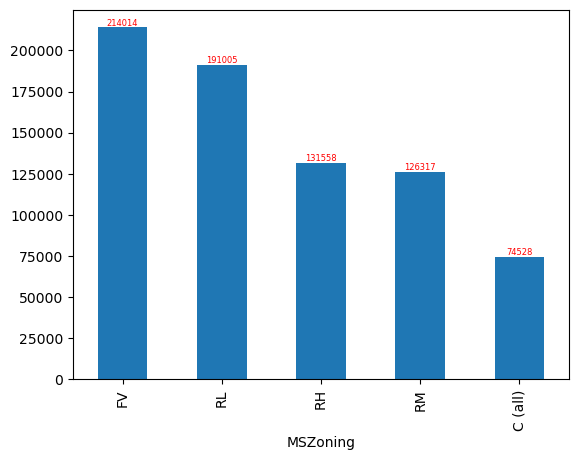

In [29]:
# SalePrice and MSZoning
ax=housedf_EDA.SalePrice.groupby(
    housedf_EDA.MSZoning).mean().sort_values(
ascending=False).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i,fontsize=6,color="red")

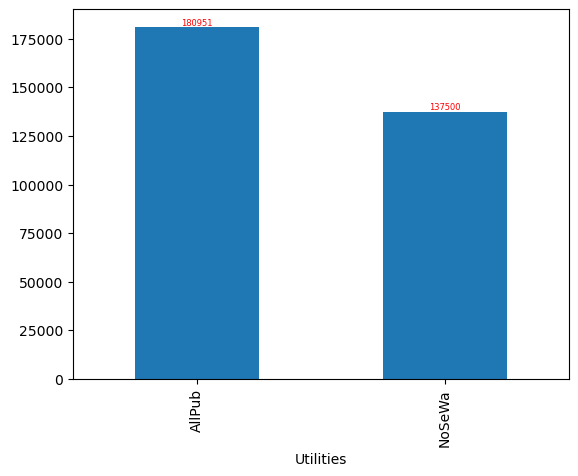

In [30]:
# SalePrice and Utilities
ax=housedf_EDA.SalePrice.groupby(
    housedf_EDA.Utilities).mean().sort_values(
ascending=False).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i,fontsize=6,color="red")

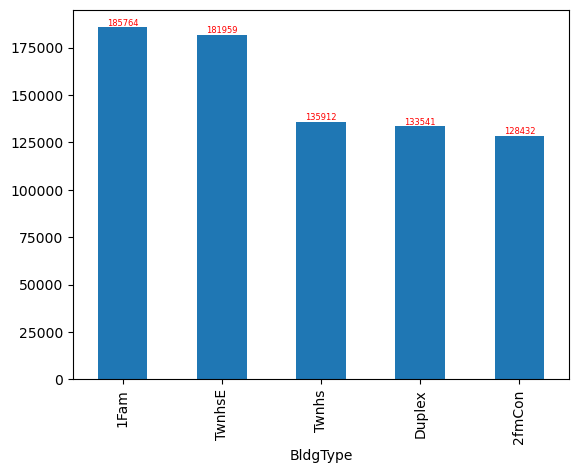

In [31]:
# SalePrice and BldgType
ax=housedf_EDA.SalePrice.groupby(
    housedf_EDA.BldgType).mean().sort_values(
ascending=False).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i,fontsize=6,color="red")

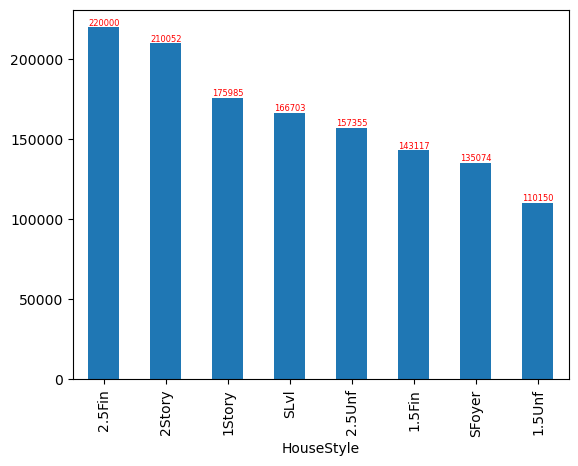

In [32]:
# SalePrice and HouseStyle
ax=housedf_EDA.SalePrice.groupby(
    housedf_EDA.HouseStyle).mean().sort_values(
ascending=False).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i,fontsize=6,color="red")

<Figure size 3000x1000 with 0 Axes>

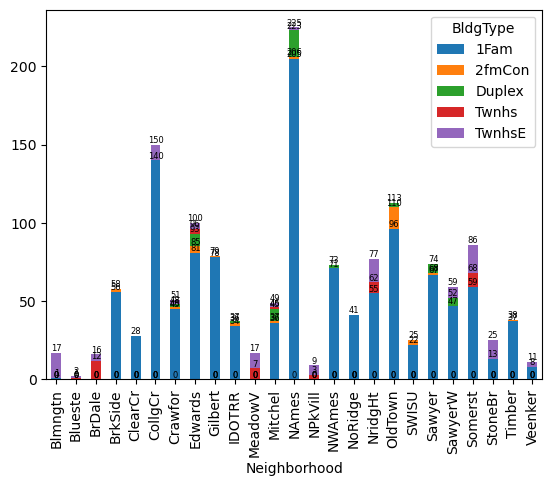

In [33]:
# Neighborhood and BldgType
plt.figure(figsize=(30,10))
ax=pd.crosstab(housedf_EDA.Neighborhood,housedf_EDA.BldgType).plot(kind='bar',stacked='True')
for i in ax.containers:
    ax.bar_label(i,fontsize=6)

<Figure size 3000x1000 with 0 Axes>

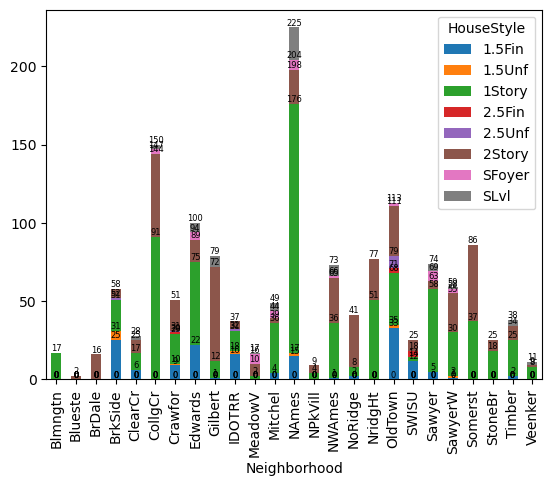

In [34]:
# Neighborhood and HouseStyle
plt.figure(figsize=(30,10))
ax=pd.crosstab(housedf_EDA.Neighborhood,housedf_EDA.HouseStyle).plot(kind='bar',stacked='True')
for i in ax.containers:
    ax.bar_label(i,fontsize=6)

<Figure size 3000x1000 with 0 Axes>

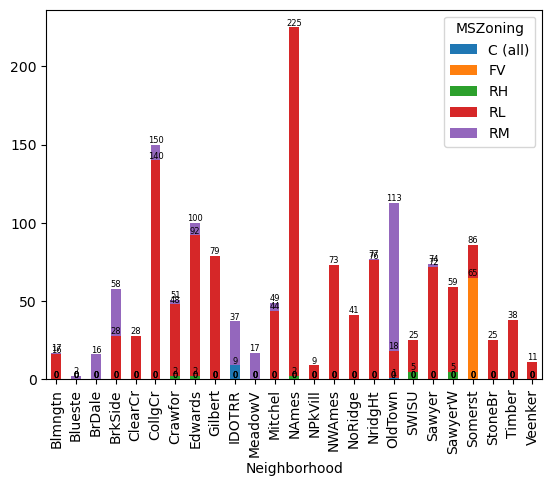

In [35]:
# Neighborhood and MS Zoning
plt.figure(figsize=(30,10))
ax=pd.crosstab(housedf_EDA.Neighborhood,housedf_EDA.MSZoning).plot(kind='bar',stacked='True')
for i in ax.containers:
    ax.bar_label(i,fontsize=6)

In [36]:
# Scaling of Numcols
from sklearn.preprocessing import StandardScaler

In [37]:
numcols_scaled=StandardScaler().fit_transform(numcols)

In [38]:
numcols_scaled=pd.DataFrame(numcols_scaled,columns=numcols.columns)

In [39]:
# Check for Multicollinearity (do not include Id)
numcols_scaled.drop('Id',axis=1).corr()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
LotFrontage       1.000000  0.361426    0.200474    0.201697    0.040330   
LotArea           0.361426  1.000000    0.124728    0.194050    0.084107   
MasVnrArea        0.200474  0.124728    1.000000    0.301427   -0.014580   
BsmtFinSF1        0.201697  0.194050    0.301427    1.000000   -0.055028   
BsmtFinSF2        0.040330  0.084107   -0.014580   -0.055028    1.000000   
BsmtUnfSF         0.106921  0.021400    0.087991   -0.477387   -0.238215   
TotalBsmtSF       0.330765  0.254150    0.393662    0.536471    0.089423   
1stFlrSF          0.423217  0.332460    0.392367    0.458091    0.084389   
2ndFlrSF          0.023249  0.031515    0.119377   -0.162240   -0.097654   
LowQualFinSF      0.005142  0.000554   -0.057380   -0.066022   -0.004913   
GrLivArea         0.348304  0.284519    0.400088    0.211682   -0.017747   
BsmtFullBath      0.100502  0.126671    0.141141    0.638911    0.162957   
BsmtHalfBath     -0.023879  0.025838    0.016204    0.078443    0.099530   
FullBath          0.163745  0.125826    0.254085    0.081566   -0.075314   
HalfBath          0.034010  0.034244    0.187685   -0.007269   -0.032368   
BedroomAbvGr      0.212073  0.132801    0.078213   -0.113468   -0.031111   
KitchenAbvGr      0.004911 -0.020854   -0.051118   -0.086342   -0.037758   
TotRmsAbvGrd      0.320571  0.213802    0.277103    0.052204   -0.048245   
Fireplaces        0.231731  0.261185    0.273129    0.293095    0.065707   
GarageCars        0.290631  0.180415    0.357659    0.255510   -0.014753   
GarageArea        0.338014  0.213249    0.370945    0.310454    0.003225   
WoodDeckSF        0.104364  0.158045    0.166606    0.223511    0.098462   
OpenPorchSF       0.151789  0.104797    0.140880    0.124191   -0.005805   
EnclosedPorch     0.011039  0.020974   -0.110614   -0.099690    0.032775   
3SsnPorch         0.024882  0.015995    0.014059    0.050914   -0.023268   
ScreenPorch       0.069352  0.054375    0.066392    0.096837    0.063329   
PoolArea          0.161025  0.093708    0.004791    0.084465    0.044530   
MiscVal           0.035161  0.069029    0.045156    0.093300   -0.005130   

               BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  \
LotFrontage     0.106921     0.330765  0.423217  0.023249      0.005142  ...   
LotArea         0.021400     0.254150  0.332460  0.031515      0.000554  ...   
MasVnrArea      0.087991     0.393662  0.392367  0.119377     -0.057380  ...   
BsmtFinSF1     -0.477387     0.536471  0.458091 -0.162240     -0.066022  ...   
BsmtFinSF2     -0.238215     0.089423  0.084389 -0.097654     -0.004913  ...   
BsmtUnfSF       1.000000     0.412291  0.296623 -0.000318      0.046920  ...   
TotalBsmtSF     0.412291     1.000000  0.801638 -0.205605     -0.023354  ...   
1stFlrSF        0.296623     0.801638  1.000000 -0.249823     -0.012704  ...   
2ndFlrSF       -0.000318    -0.205605 -0.249823  1.000000      0.017803  ...   
LowQualFinSF    0.046920    -0.023354 -0.012704  0.017803      1.000000  ...   
GrLivArea       0.234017     0.445223  0.562538  0.655085      0.096916  ...   
BsmtFullBath   -0.398054     0.325939  0.257950 -0.160956     -0.047031  ...   
BsmtHalfBath   -0.106960     0.012600  0.010462 -0.060133     -0.013482  ...   
FullBath        0.273231     0.327751  0.373077  0.402865     -0.002876  ...   
HalfBath       -0.035744    -0.055676 -0.104141  0.611362     -0.039508  ...   
BedroomAbvGr    0.183300     0.053433  0.108418  0.503506      0.070365  ...   
KitchenAbvGr    0.065001    -0.038948  0.076071  0.069032      0.000438  ...   
TotRmsAbvGrd    0.247514     0.282082  0.391782  0.584586      0.102059  ...   
Fireplaces      0.004881     0.332948  0.407545  0.169991     -0.006635  ...   
GarageCars      0.180067     0.437900  0.440452  0.182532     -0.067345  ...   
GarageArea      0.164435     0.486021  0.491979  0.128548     -0.053552  ...   
WoodDeckSF     -0.039244     0.229614  0.227347  0

In [40]:
import seaborn as sns

<Axes: >

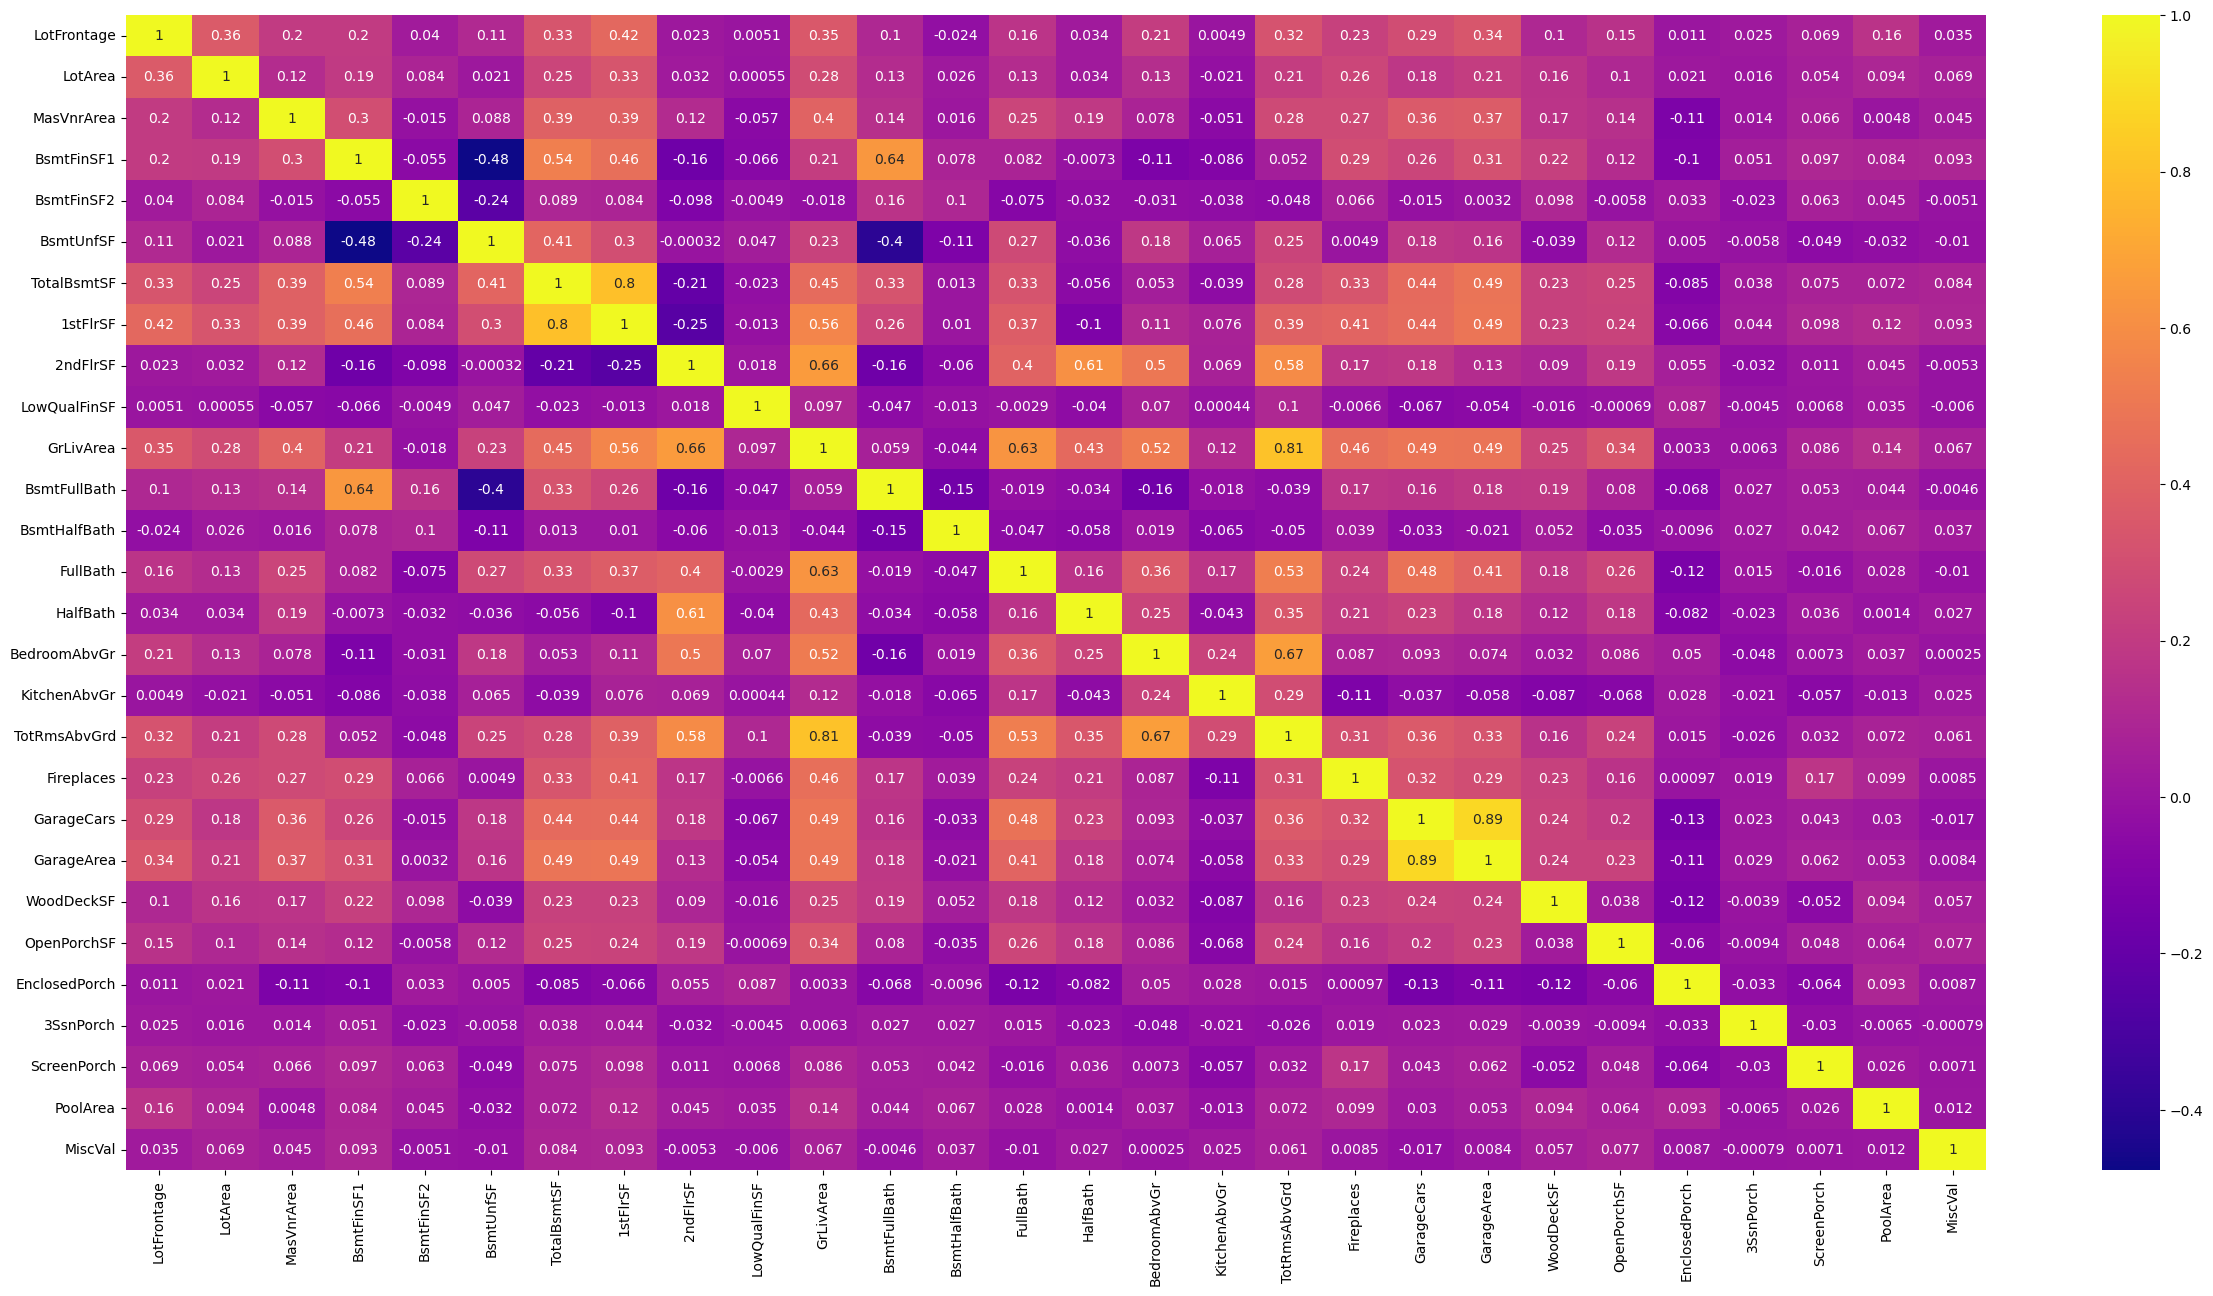

In [41]:
plt.figure(figsize=(30,15))
sns.heatmap(numcols_scaled.drop('Id',axis=1).corr(),annot=True,
           cmap="plasma")

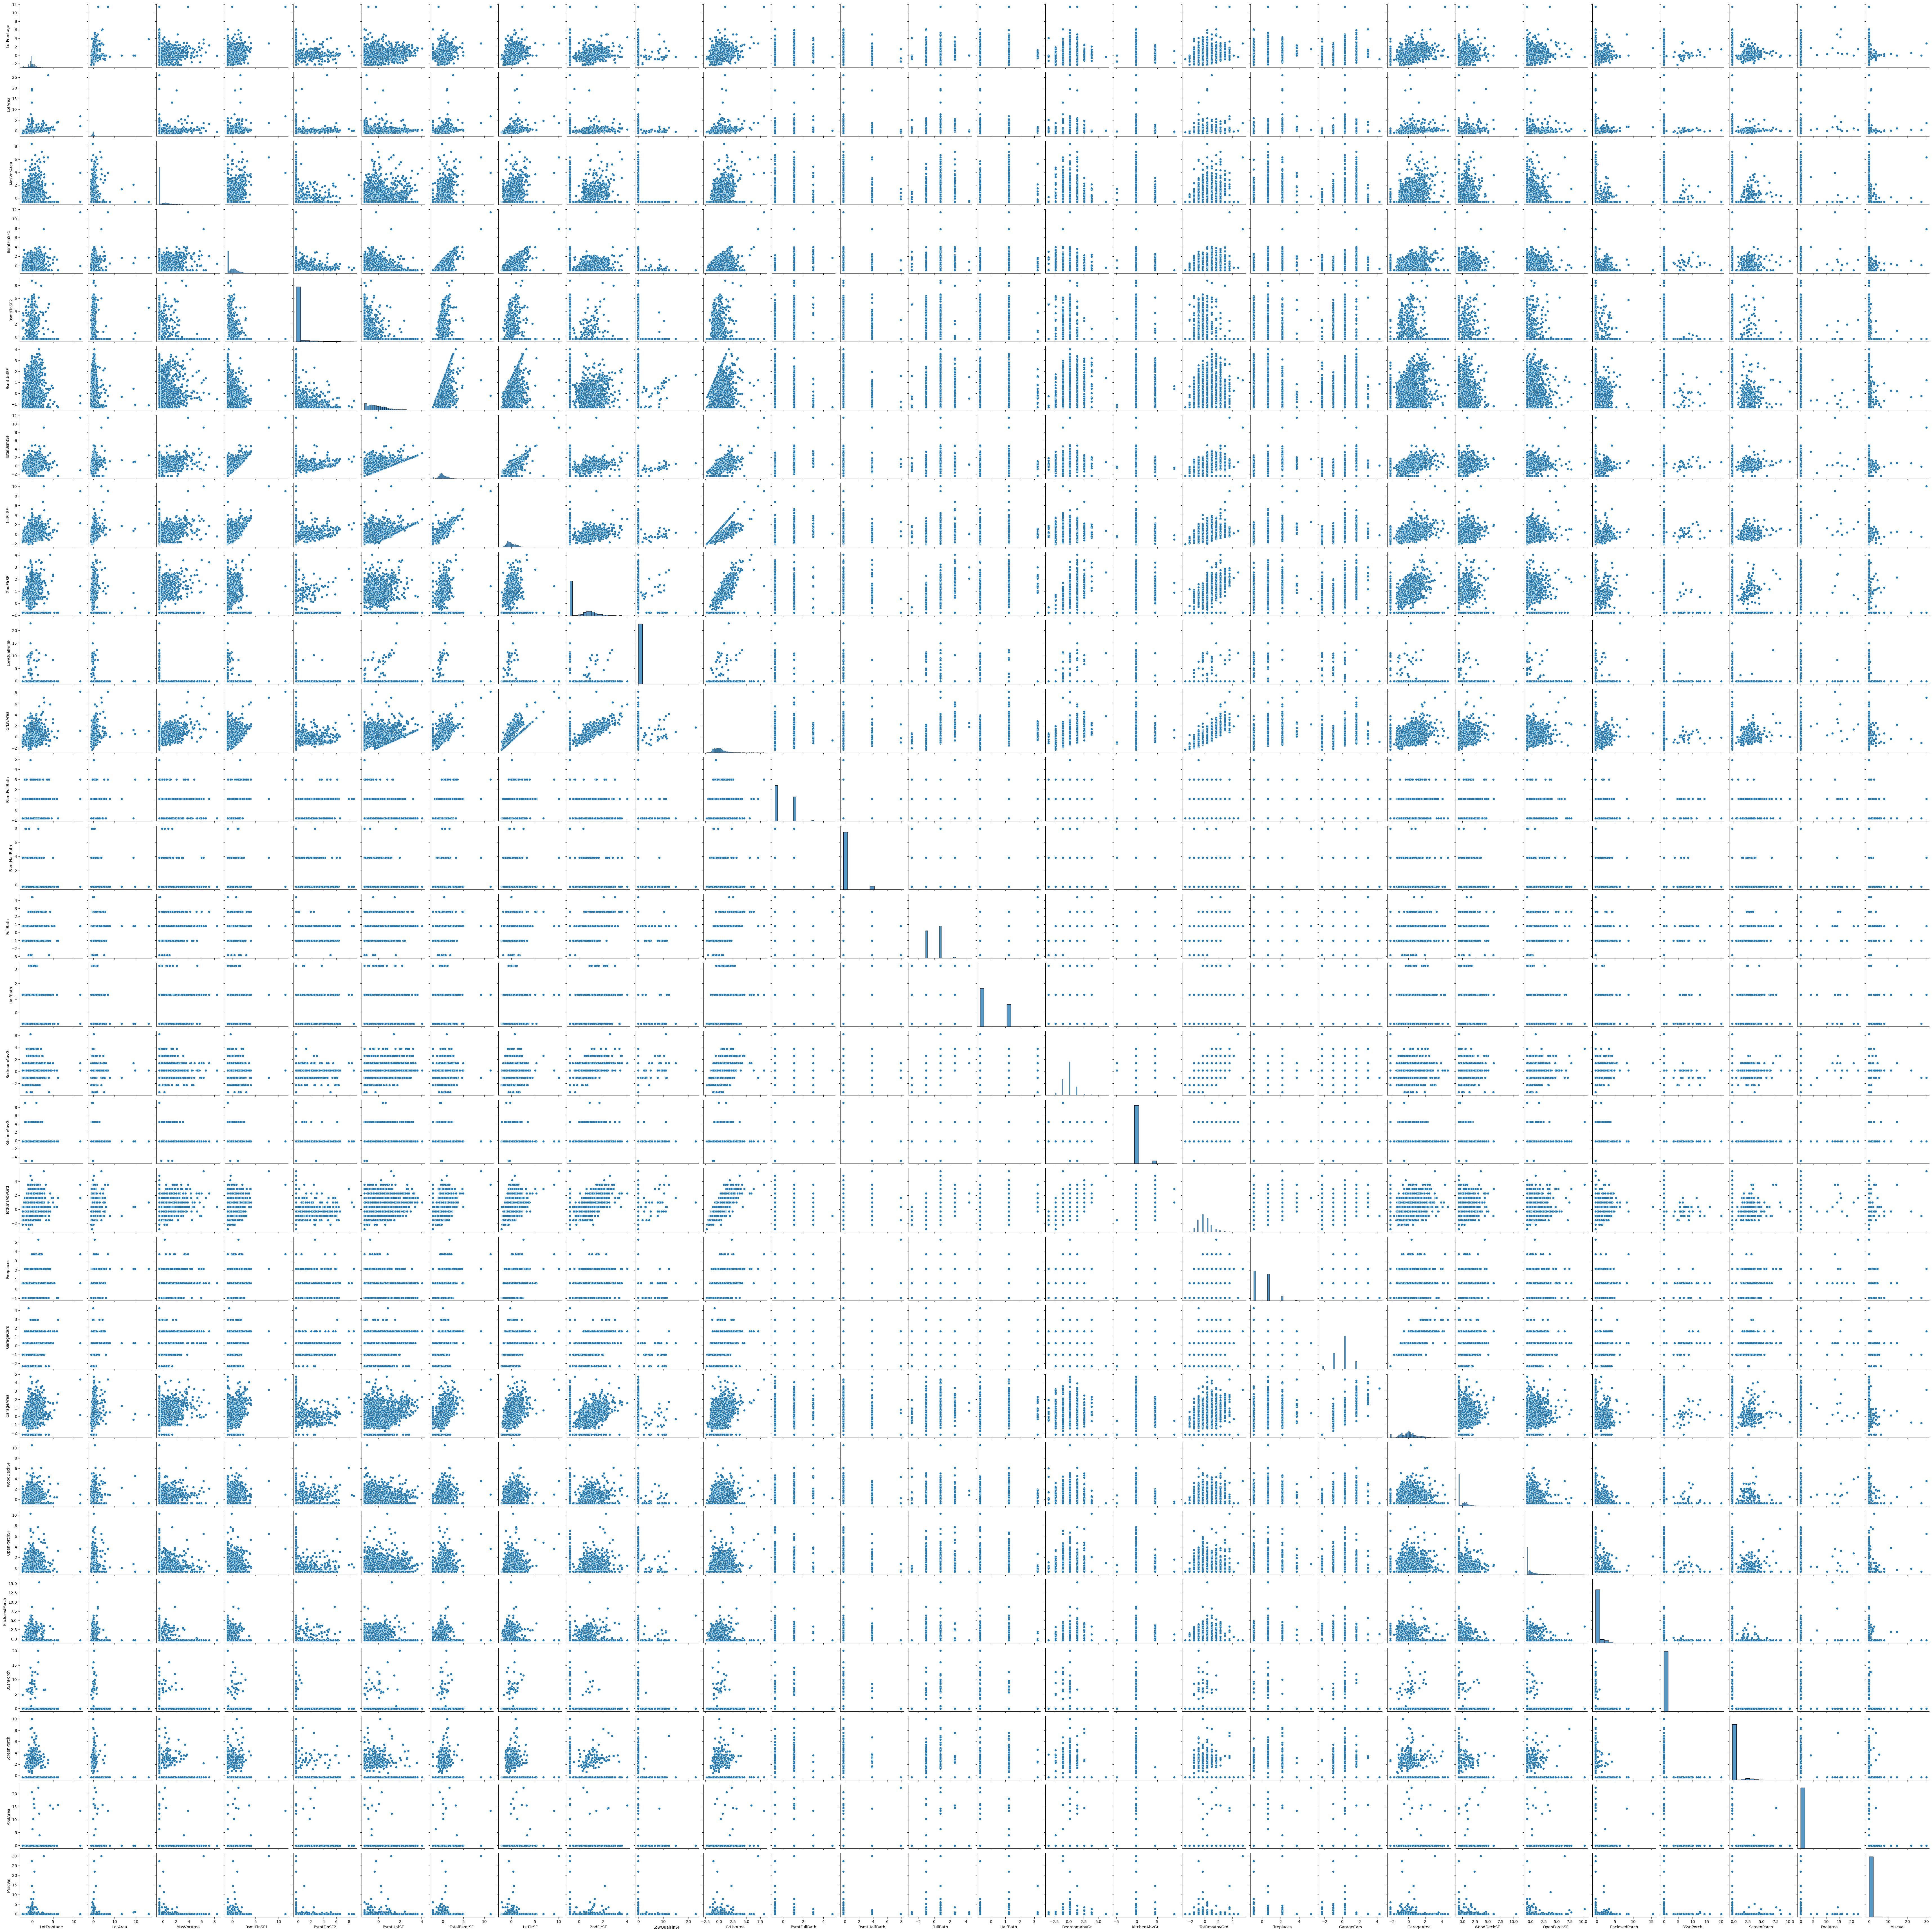

In [42]:
sns.pairplot(numcols_scaled.drop('Id',axis=1))

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
objcols=objcols.drop('SalePrice',axis=1)

In [45]:
objcols_encode=objcols.apply(LabelEncoder().fit_transform)

In [46]:
catcols_encode=catcols.apply(LabelEncoder().fit_transform)

In [47]:
numcols_scaled=numcols_scaled.reset_index()

In [48]:
objcols_encode=objcols_encode.reset_index()

In [49]:
catcols_encode=catcols_encode.reset_index()

In [50]:
housedf_clean=pd.concat([numcols_scaled,objcols_encode,catcols_encode],
                       axis=1)

In [51]:
housedf_clean=housedf_clean.reset_index()

In [52]:
combinedf=combinedf.reset_index()

In [53]:
housedf_clean['SalePrice']=combinedf.SalePrice

In [54]:
housetrain_df=housedf_clean[housedf_clean.SalePrice!='test']
housetest_df=housedf_clean[housedf_clean.SalePrice=='test']                  

In [55]:
housetest_df=housetest_df.drop('SalePrice',axis=1)

In [56]:
y=housetrain_df.SalePrice
X=housetrain_df.drop('SalePrice',axis=1)

In [57]:
X=X.drop(['level_0','index','Id'],axis=1)

In [58]:
housetest_df=housetest_df.drop(['level_0','index','Id'],axis=1)

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
reg=LinearRegression()

In [61]:
regmodel=reg.fit(X,y)

In [62]:
regmodel.score(X,y)

0.8530163621049884

In [63]:
regpredict=regmodel.predict(X)

In [64]:
regresid=y-regpredict

In [65]:
np.sqrt(np.mean(regresid**2)) # RMSE

30446.588145626

In [66]:
reg_test_pred=regmodel.predict(housetest_df)

In [67]:
pd.DataFrame(reg_test_pred).to_csv("reg.csv")

In [68]:
#from sklearn.tree import DecisionTreeRegressor

In [69]:
#tree=DecisionTreeRegressor(max_depth=8)

In [70]:
#treemodel=tree.fit(X,y)

In [71]:
#treemodel.score(X,y)

0.960150957255043

In [72]:
#tree_test_pred=treemodel.predict(housetest_df)

In [73]:
#pd.DataFrame(tree_test_pred).to_csv("tree.csv")

In [74]:
#from sklearn.model_selection import cross_val_score

In [75]:
#cross_val_score(reg,X,y)

array([ 8.53982943e-01,  8.09334491e-01,  8.55068318e-01, -1.68766442e+14,
        6.27226241e-01])

In [76]:
#np.mean([0.85398294, 0.80933449, 0.85506832, 0.83927073, 0.62722624])

0.7969765440000001

In [77]:
#cross_val_score(tree,X,y)

array([0.70876325, 0.72618941, 0.81012858, 0.74060885, 0.71768823])

In [78]:
#np.mean([0.69807963, 0.76214125, 0.79489189, 0.75292824, 0.62969606])

0.7275474140000001

In [79]:
#from sklearn.ensemble import RandomForestRegressor

In [80]:
#RF=RandomForestRegressor(n_estimators=3000)

In [81]:
#RFmodel=RF.fit(X,y)

In [82]:
#RFmodel.score(X,y)

In [83]:
#cross_val_score(RF,X,y)

In [84]:
#np.mean([0.89574835, 0.84294427, 0.8589374 , 0.8894134 , 0.83264692])

In [85]:
#RFpredict=RFmodel.predict(X)

In [86]:
#RFresid=y-RFpredict

In [87]:
#np.sqrt(np.mean(RFresid**2))

In [88]:
#RF_test_pred=RFmodel.predict(housetest_df)

In [89]:
#pd.DataFrame(RF_test_pred).to_csv("RF.csv")

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [92]:
from lazypredict.Supervised import LazyRegressor

In [93]:
reg = LazyRegressor(verbose=0, ignore_warnings=False,custom_metric=None)

In [94]:
models,predictions = reg.fit(X_train,X_test,y_train,y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:21<00:00,  1.96it/s]


In [95]:
models

Adjusted R-Squared  \
Model                                                       
GradientBoostingRegressor                            0.88   
HistGradientBoostingRegressor                        0.88   
RandomForestRegressor                                0.88   
XGBRegressor                                         0.87   
LGBMRegressor                                        0.87   
GammaRegressor                                       0.86   
PoissonRegressor                                     0.86   
HuberRegressor                                       0.85   
PassiveAggressiveRegressor                           0.84   
BaggingRegressor                                     0.84   
AdaBoostRegressor                                    0.82   
BayesianRidge                                        0.81   
LassoLarsIC                                          0.81   
ElasticNet                                           0.81   
RidgeCV                                              0.81   
Ridge                                                0.81   
TransformedTargetRegressor                           0.81   
LinearRegression                                     0.81   
Lasso                                                0.81   
LassoLars                                            0.81   
ExtraTreesRegressor                                  0.81   
LassoCV                                              0.79   
LassoLarsCV                                          0.79   
TweedieRegressor                                     0.79   
OrthogonalMatchingPursuit                            0.79   
OrthogonalMatchingPursuitCV                          0.79   
SGDRegressor                                         0.79   
KNeighborsRegressor                                  0.73   
DecisionTreeRegressor                                0.71   
ExtraTreeRegressor                                   0.64   
LarsCV                                               0.51   
ElasticNetCV                                         0.02   
DummyRegressor                                      -0.22   
NuSVR                                               -0.23   
SVR                                                 -0.26   
QuantileRegressor                                   -0.26   
Lars                                                -1.09   
KernelRidge                                         -5.12   
MLPRegressor                                        -5.67   
LinearSVR                                           -5.82   
GaussianProcessRegressor                            -5.84   
RANSACRegressor               -14124290264140399771648.00   

                                                R-Squared                RMSE  \
Model                                                                           
GradientBoostingRegressor                            0.90            25930.93   
HistGradientBoostingRegressor                        0.90            26296.90   
RandomForestRegressor                                0.90            26516.75   
XGBRegressor                                         0.90            26758.21   
LGBMRegressor                                        0.90            26793.60   
GammaRegressor                                       0.89            27832.38   
PoissonRegressor                                     0.88            28397.48   
HuberRegressor                                       0.88            29423.04   
PassiveAggressiveRegressor                           0.87            30285.58   
BaggingRegressor                                     0.87            30296.31   
AdaBoostRegressor                                    0.85            32266.14   
BayesianRidge                                        0.85            32604.11   
LassoLarsIC                                          0.85            32670.47   
ElasticNet                                           0.84            32922.91   
RidgeCV                                              0.84 

In [96]:
from sklearn.ensemble import GradientBoostingRegressor

In [97]:
from sklearn.neural_network import MLPRegressor

In [103]:
nn = MLPRegressor(hidden_layer_sizes=(100,50),max_iter=1000,solver="lbfgs")

In [104]:
nnmodel = nn.fit(X,y)

In [105]:
nnmodel.score(X,y)

0.9122779406956066

In [106]:
nnpredict = nnmodel.predict(housetest_df)

In [107]:
pd.DataFrame(nnpredict).to_csv('nn.csv')